In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/probabilistic-modelling-24-classify-the-market/sample_submission.csv
/kaggle/input/probabilistic-modelling-24-classify-the-market/train.csv
/kaggle/input/probabilistic-modelling-24-classify-the-market/test.csv


# Reading Data

In [2]:
train_df = pd.read_csv('/kaggle/input/probabilistic-modelling-24-classify-the-market/train.csv')
train_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,1
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,0
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,2


In [3]:
tst_df = pd.read_csv('/kaggle/input/probabilistic-modelling-24-classify-the-market/test.csv')
tst_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3
...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2


In [4]:
#El format elly n3ml beha el submission
sample = pd.read_csv('/kaggle/input/probabilistic-modelling-24-classify-the-market/sample_submission.csv')
sample

,row_id,label
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
5676,5676,-1
5677,5677,-1
5678,5678,-1
5679,5679,-1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      8523 non-null   object 
 1   X2      7060 non-null   float64
 2   X3      8523 non-null   object 
 3   X4      8523 non-null   float64
 4   X5      8523 non-null   object 
 5   X6      8523 non-null   float64
 6   X7      8523 non-null   object 
 7   X8      8523 non-null   int64  
 8   X9      6113 non-null   object 
 9   X10     8523 non-null   object 
 10  Y       8523 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 732.6+ KB


In [6]:
categ_cols = []
num_cols = []

for col in train_df.columns:
    if train_df[col].dtype == 'object':
        categ_cols.append(col)
    else:
        num_cols.append(col)

categ_cols

['X1', 'X3', 'X5', 'X7', 'X9', 'X10']

# EDA

In [7]:
train_df['Y'].unique()

array([0, 2, 1, 3])

In [8]:
train_df['Y'].value_counts()

Y
0    5577
1    1083
3     935
2     928
Name: count, dtype: int64

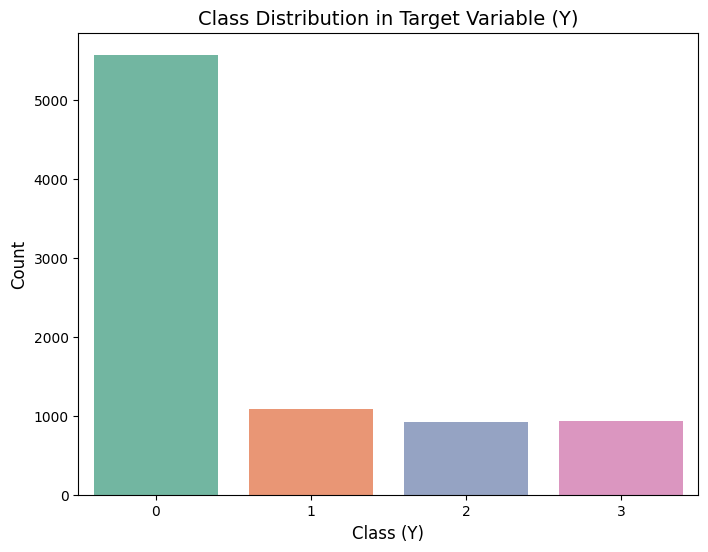

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Y', data=train_df, palette='Set2')

plt.title("Class Distribution in Target Variable (Y)", fontsize=14)
plt.xlabel("Class (Y)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Data is very imbalanced.

In [10]:
train_df.isnull().sum()

X1        0
X2     1463
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9     2410
X10       0
Y         0
dtype: int64

## Categorical Data

In [11]:
for col in categ_cols:
    print(f'Number of unique values in {col}: {train_df[col].nunique()}')
    if train_df[col].nunique() < 50:
        print(f'Unique values in {col}: {train_df[col].unique()}')

Number of unique values in X1: 1559
Number of unique values in X3: 5
Unique values in X3: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Number of unique values in X5: 16
Unique values in X5: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Number of unique values in X7: 10
Unique values in X7: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Number of unique values in X9: 3
Unique values in X9: ['Medium' nan 'High' 'Small']
Number of unique values in X10: 3
Unique values in X10: ['Tier 1' 'Tier 3' 'Tier 2']


### Nulls

In [12]:
train_df[categ_cols].isnull().sum()

X1        0
X3        0
X5        0
X7        0
X9     2410
X10       0
dtype: int64

We have to substitute the nulls in X9 somehow. We will try mode replacement, knn_imbuter, and then keeping it as an "unknown" category.

In [13]:
train_df["X9"].value_counts()

X9
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [14]:
train_df['unk_X9'] = train_df['X9'].fillna('Unknown')
train_df['Med_X9'] = train_df['X9'].fillna('Medium')

In [15]:
encoding_dict = {
    'Small': 1, 
    'Medium': 2, 
    'High': 3
}

train_df['X9'] = train_df['X9'].replace(encoding_dict)
train_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y,unk_X9,Med_X9
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,Tier 1,0,Medium,Medium
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,Tier 3,2,Medium,Medium
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,Tier 1,0,Medium,Medium
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,1,Unknown,Medium
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,0,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,3.0,Tier 3,0,High,High
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,0,Unknown,Medium
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,1.0,Tier 2,0,Small,Small
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,2.0,Tier 3,2,Medium,Medium


In [16]:
train_df['X9'].isnull().sum()

2410

In [17]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

train_df['imputed_X9'] = knn_imputer.fit_transform(train_df[['X9']])

train_df['imputed_X9'] = train_df['imputed_X9'].round().astype(int)

In [18]:
# We will manually encode so that we know which categ is which and have it be the same acros the 3 columns
mapping_X9 = {'Unknown': 0, 'Small': 1, 'Medium': 2, 'High': 3}
train_df['Med_X9'] = train_df['Med_X9'].map(mapping_X9)
train_df['unk_X9'] = train_df['unk_X9'].map(mapping_X9)
#train_df['X9'] = train_df['X9'].map(mapping_X9)
train_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y,unk_X9,Med_X9,imputed_X9
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,Tier 1,0,2,2,2
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,Tier 3,2,2,2,2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,Tier 1,0,2,2,2
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,1,0,2,2
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,3.0,Tier 3,0,3,3,3
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,0,0,2,2
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,1.0,Tier 2,0,1,1,1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,2.0,Tier 3,2,2,2,2


In [19]:
X9 = ['Med_X9','imputed_X9', 'unk_X9']
for col in X9:
    print(f'{train_df[col].value_counts()}')
    print('-----------------------------')

Med_X9
2    5203
1    2388
3     932
Name: count, dtype: int64
-----------------------------
imputed_X9
2    5203
1    2388
3     932
Name: count, dtype: int64
-----------------------------
unk_X9
2    2793
0    2410
1    2388
3     932
Name: count, dtype: int64
-----------------------------


We can see that the KNN imputer simply replaced missing values with the mode which is the same as the Med_X9 column.

### Encoding

In [20]:
train_df['X1'].value_counts()

X1
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Because X1 has 1559 unique values which will be too many to encode and possibly do not correlate to the target we will use frequency encoding to decrease the number of values (values with repeated frequencies end up as 1 value).

In [21]:
frequency_encoding = train_df['X1'].value_counts().to_dict()
train_df['X1'] = train_df['X1'].map(frequency_encoding)
train_df['X1'].value_counts()

X1
6     2298
5     1975
7     1771
4      936
8      880
3      339
9      225
2       70
10      20
1        9
Name: count, dtype: int64

In [22]:
train_df['X3'].value_counts()

X3
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

X3 only has 2 values but in different format so we will fix that.

In [23]:
train_df['X3'] = train_df['X3'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
train_df['X3'].value_counts()

X3
Low Fat    5517
Regular    3006
Name: count, dtype: int64

The rest of the remaining categ columns are ready to be encoded but X10 will be ordinally encoded because it is obviously ordered.

In [24]:
oe_X10 = OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3']])
train_df['X10'] = oe_X10.fit_transform(train_df[['X10']])

In [25]:
le_X3 = LabelEncoder()
train_df['X3'] = le_X3.fit_transform(train_df['X3'])

le_X5 = LabelEncoder()
train_df['X5'] = le_X5.fit_transform(train_df['X5'])

le_X7 = LabelEncoder()
train_df['X7'] = le_X7.fit_transform(train_df['X7'])

# hshof el mapping
category_mapping = dict(zip(le_X3.classes_, le_X3.transform(le_X3.classes_)))
print(category_mapping)  

category_mapping = dict(zip(le_X5.classes_, le_X5.transform(le_X5.classes_)))
print(category_mapping) 

category_mapping = dict(zip(le_X7.classes_, le_X7.transform(le_X7.classes_)))
print(category_mapping) 

{'Low Fat': 0, 'Regular': 1}
{'Baking Goods': 0, 'Breads': 1, 'Breakfast': 2, 'Canned': 3, 'Dairy': 4, 'Frozen Foods': 5, 'Fruits and Vegetables': 6, 'Hard Drinks': 7, 'Health and Hygiene': 8, 'Household': 9, 'Meat': 10, 'Others': 11, 'Seafood': 12, 'Snack Foods': 13, 'Soft Drinks': 14, 'Starchy Foods': 15}
{'OUT010': 0, 'OUT013': 1, 'OUT017': 2, 'OUT018': 3, 'OUT019': 4, 'OUT027': 5, 'OUT035': 6, 'OUT045': 7, 'OUT046': 8, 'OUT049': 9}


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X1          8523 non-null   int64  
 1   X2          7060 non-null   float64
 2   X3          8523 non-null   int64  
 3   X4          8523 non-null   float64
 4   X5          8523 non-null   int64  
 5   X6          8523 non-null   float64
 6   X7          8523 non-null   int64  
 7   X8          8523 non-null   int64  
 8   X9          6113 non-null   float64
 9   X10         8523 non-null   float64
 10  Y           8523 non-null   int64  
 11  unk_X9      8523 non-null   int64  
 12  Med_X9      8523 non-null   int64  
 13  imputed_X9  8523 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 932.3 KB


## Numerical Data

In [27]:
num_cols = ['X2', 'X4', 'X6', 'X8']
for col in num_cols:
    print(f'Number of unique values in {col}: {train_df[col].nunique()}')
    if train_df[col].nunique() < 50:
        print(f'Unique values in {col}: {train_df[col].unique()}')

Number of unique values in X2: 415
Number of unique values in X4: 7880
Number of unique values in X6: 5938
Number of unique values in X8: 9
Unique values in X8: [1999 2009 1998 1987 1985 2002 2007 1997 2004]


We can assume that X8 contains a year related to something in the dataset

### Nulls

In [28]:
train_df[num_cols].isnull().sum()

X2    1463
X4       0
X6       0
X8       0
dtype: int64

In [29]:
X2_imputer = SimpleImputer(strategy='median')
train_df['X2'] = X2_imputer.fit_transform(train_df[['X2']])
train_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y,unk_X9,Med_X9,imputed_X9
0,8,9.300,0,0.016047,4,249.8092,9,1999,2.0,0.0,0,2,2,2
1,6,5.920,1,0.019278,14,48.2692,3,2009,2.0,2.0,2,2,2,2
2,7,17.500,0,0.016760,10,141.6180,9,1999,2.0,0.0,0,2,2,2
3,6,19.200,1,0.000000,6,182.0950,0,1998,NaN,2.0,1,0,2,2
4,6,8.930,0,0.000000,9,53.8614,1,1987,3.0,2.0,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8,6.865,0,0.056783,13,214.5218,1,1987,3.0,2.0,0,3,3,3
8519,6,8.380,1,0.046982,0,108.1570,7,2002,NaN,1.0,0,0,2,2
8520,6,10.600,0,0.035186,8,85.1224,6,2004,1.0,1.0,0,1,1,1
8521,6,7.210,1,0.145221,13,103.1332,3,2009,2.0,2.0,2,2,2,2


In [30]:
train_df[num_cols].isnull().sum()

X2    0
X4    0
X6    0
X8    0
dtype: int64

### Outliers

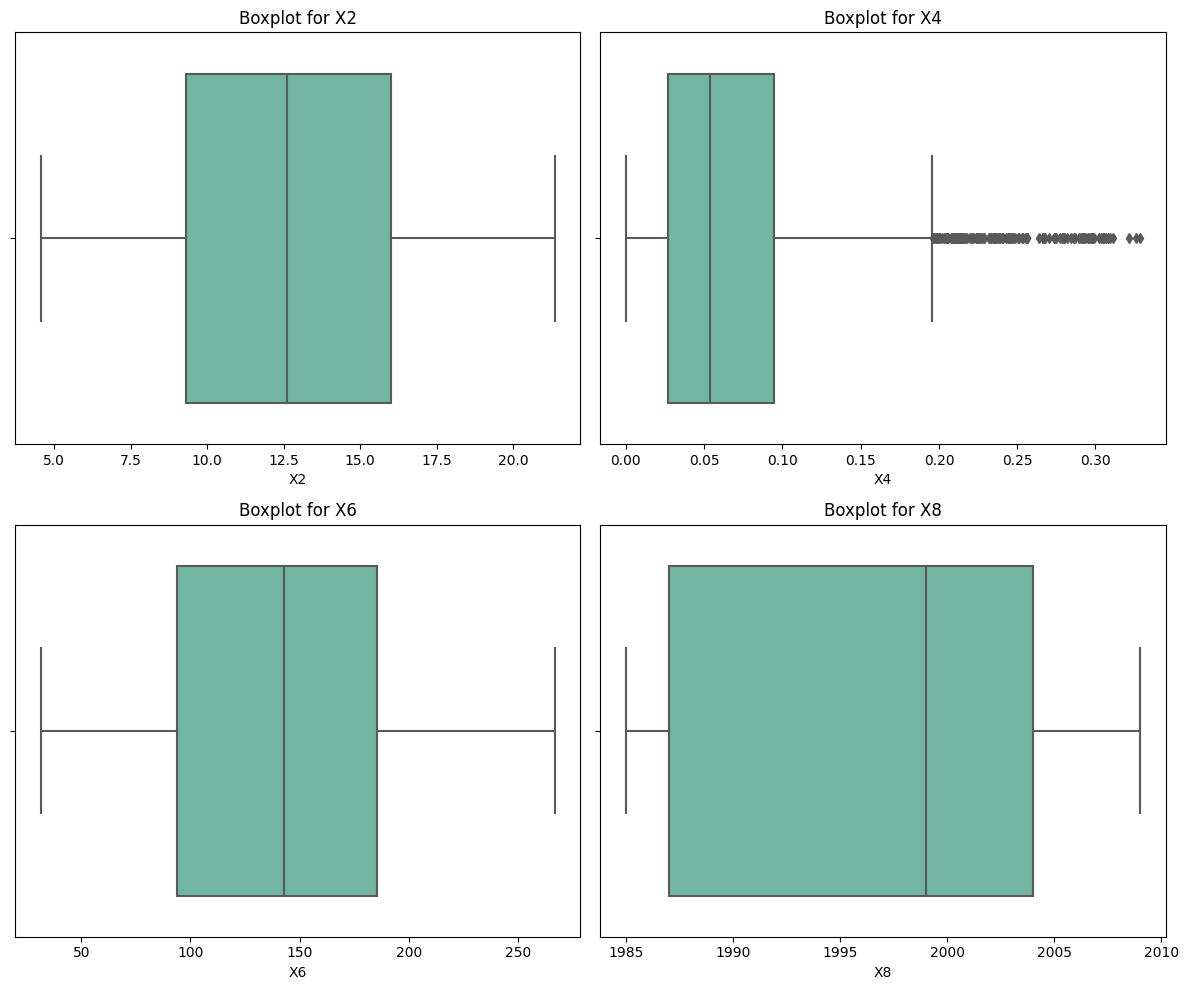

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(ax=axes[i], data=train_df, x=col, palette='Set2')
    axes[i].set_title(f'Boxplot for {col}')

plt.tight_layout()

plt.show()

X4 is the only one with outliers, so we will handle those.

In [32]:
lower_bound_X4 = train_df['X4'].quantile(0.05)
upper_bound_X4 = train_df['X4'].quantile(0.95)
train_df['X4'] = train_df['X4'].clip(lower=lower_bound_X4, upper=upper_bound_X4)

In [33]:
# from scipy.stats import mstats
# train_df['X4'] = mstats.winsorize(train_df['X4'], limits=[0.05, 0.05])
# same output bs a7sn yb2a 3ndi value el bounds 34an lw hst5dmha 3la el test

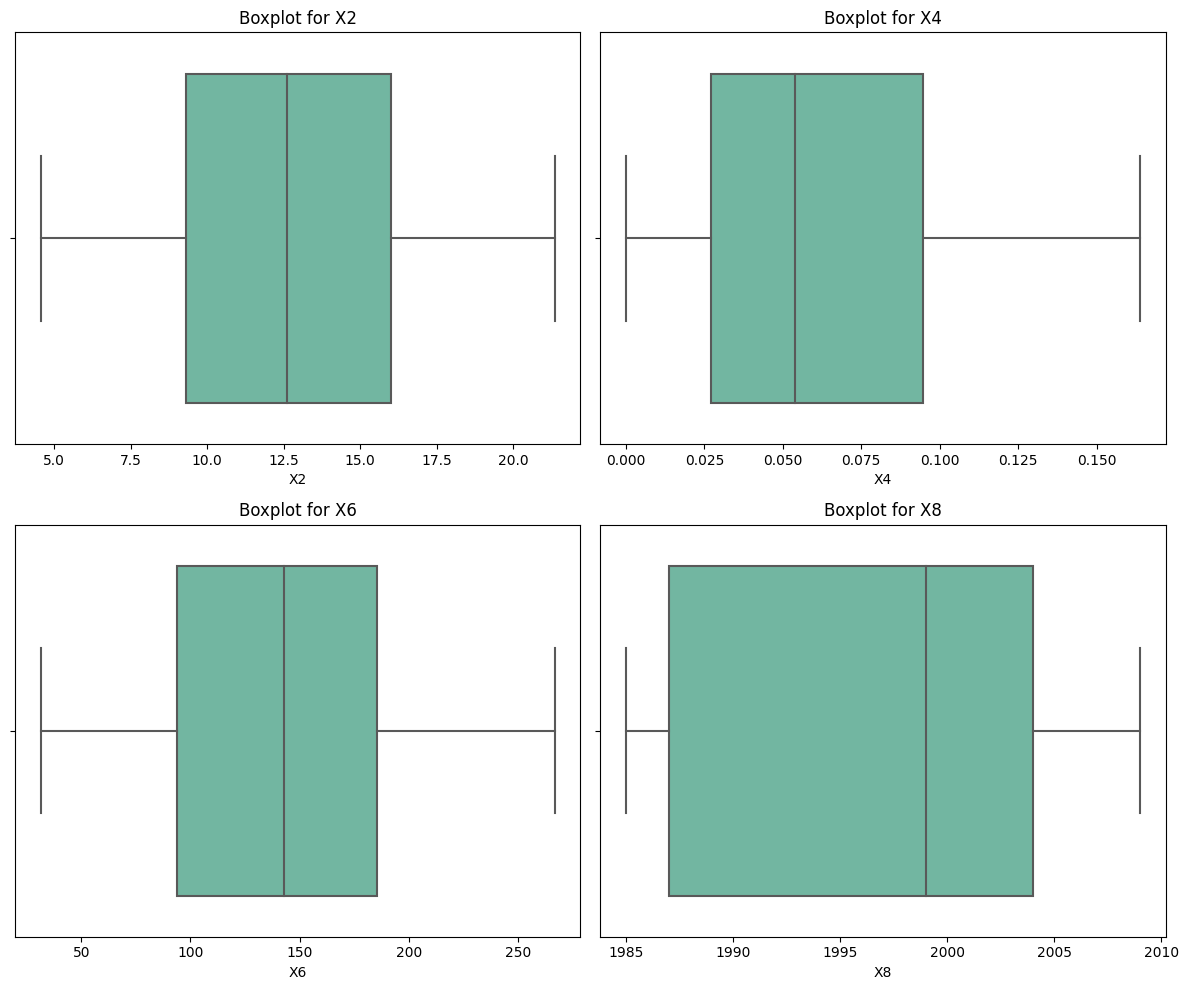

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(ax=axes[i], data=train_df, x=col, palette='Set2')
    axes[i].set_title(f'Boxplot for {col}')

plt.tight_layout()

plt.show()

### Skew

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

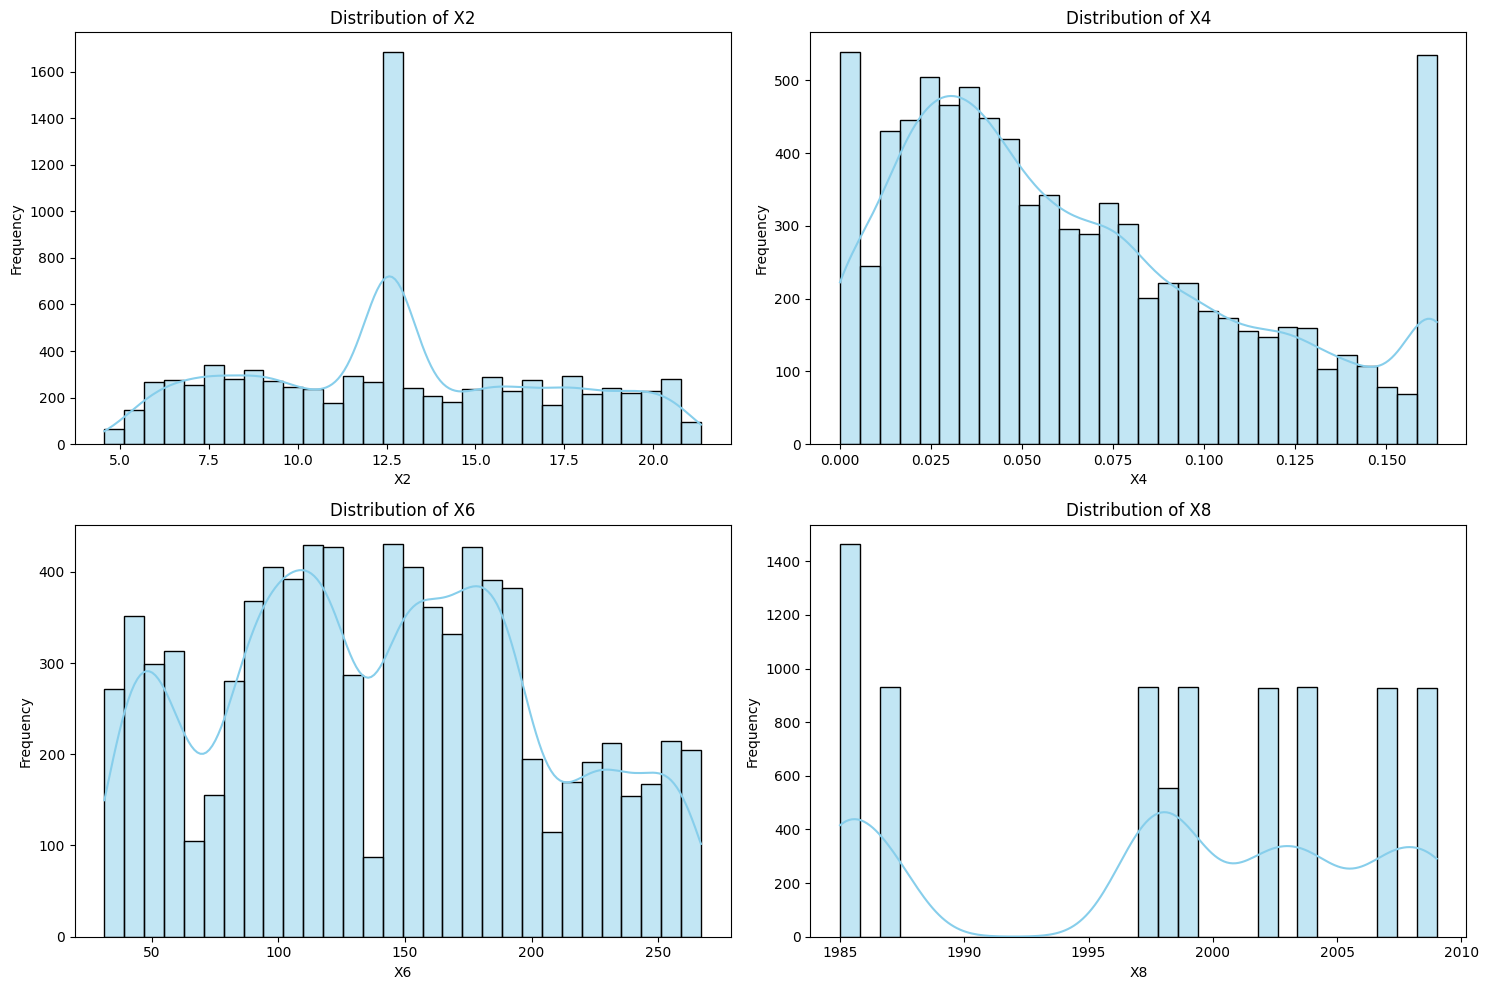

In [35]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)  
    sns.histplot(train_df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [36]:
for col in num_cols:
    print(f'Skewness of {col}: {skew(train_df[col].dropna())}')

Skewness of X2: 0.12182405058759048
Skewness of X4: 0.6451731854251368
Skewness of X6: 0.12717988033368544
Skewness of X8: -0.39657097595805835


Skew is small for all of them, typically there is no need to handle but because we are using GMM which is sensitive to skew we will use log transform to fix this.

In [37]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
train_df[['X4', 'X8']] = transformer.fit_transform(train_df[['X4', 'X8']])

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [38]:
for col in num_cols:
    print(f'Skewness of {col}: {skew(train_df[col].dropna())}')

Skewness of X2: 0.12182405058759048
Skewness of X4: 0.11258878645344218
Skewness of X6: 0.12717988033368544
Skewness of X8: -0.20092395875973085


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


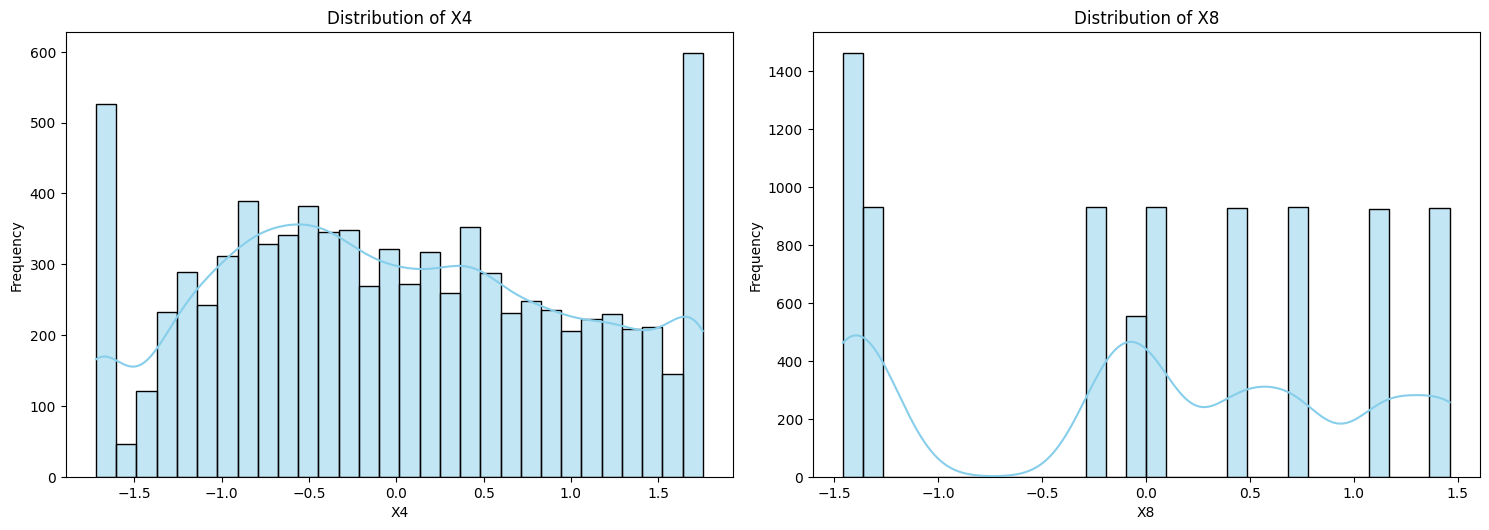

In [39]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(['X4','X8'], 1):
    plt.subplot(2, 2, i)  
    sns.histplot(train_df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Scale

In [40]:
train_df[num_cols].describe()

,X2,X4,X6,X8
count,8523.00000,8.523000e+03,8523.000000,8.523000e+03
mean,12.81342,1.525629e-16,140.992782,-4.001649e-16
std,4.22724,1.000059e+00,62.275067,1.000059e+00
min,4.55500,-1.719835e+00,31.290000,-1.457444e+00
25%,9.31000,-8.003175e-01,93.826500,-1.270835e+00
50%,12.60000,-6.332015e-02,143.012800,4.856208e-02
75%,16.00000,7.902755e-01,185.643700,7.149118e-01
max,21.35000,1.755423e+00,266.888400,1.461925e+00


In [41]:
# num_col_scaler = StandardScaler()
# train_df[num_cols] = num_col_scaler.fit_transform(train_df[num_cols])
num_col_scaler = MinMaxScaler()

train_df[num_cols] = num_col_scaler.fit_transform(train_df[num_cols])
train_df[num_cols].describe()

train_df[num_cols].describe()

,X2,X4,X6,X8
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.491719,0.494880,0.465635,0.499233
std,0.251696,0.287765,0.264327,0.342560
min,0.000000,0.000000,0.000000,0.000000
25%,0.283120,0.264590,0.265437,0.063921
50%,0.479012,0.476659,0.474209,0.515867
75%,0.681453,0.722280,0.655156,0.744118
max,1.000000,1.000000,1.000000,1.000000


## Correlation

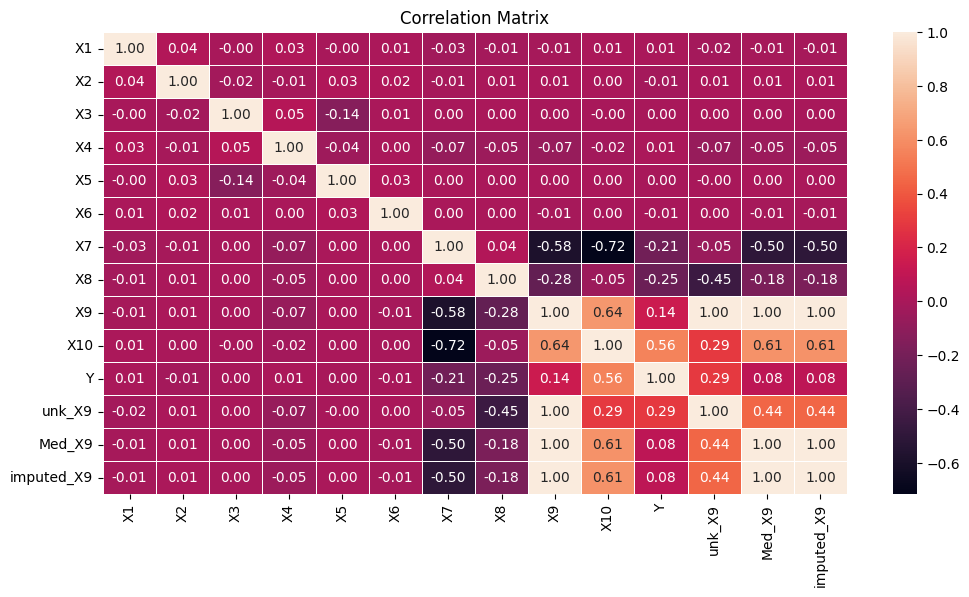

In [42]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can see that out of the X9 columns, unk_X9 (where we replaced the nan with 'Unknown') has the highest correlation with Y. So we will keep it and drop the others.

In [43]:
train_df['X9']=train_df['unk_X9']
train_df.drop(columns=['unk_X9', 'imputed_X9', 'Med_X9'], inplace=True)
train_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,8,0.282525,0,0.164352,4,0.927507,9,0.515867,2,0.0,0
1,6,0.081274,1,0.194889,14,0.072068,3,1.000000,2,2.0,2
2,7,0.770765,0,0.171158,10,0.468288,9,0.515867,2,0.0,0
3,6,0.871986,1,0.000000,6,0.640093,0,0.473269,0,2.0,1
4,6,0.260494,0,0.000000,9,0.095805,1,0.063921,3,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
8518,8,0.137541,0,0.496555,13,0.777729,1,0.063921,3,2.0,0
8519,6,0.227746,1,0.426266,0,0.326263,7,0.649673,0,1.0,0
8520,6,0.359929,0,0.334040,8,0.228492,6,0.744118,1,1.0,0
8521,6,0.158083,1,0.938806,13,0.304939,3,1.000000,2,2.0,2


In [44]:
# sns.pairplot(train_df[num_cols + ['Y']], hue='Y', palette='Set1', diag_kind='kde')

# plt.suptitle('Pairplot of Numerical Features', y=1.02)
# plt.show()

In [45]:
# sns.pairplot(train_df[categ_cols + ['Y']], hue='Y', palette='Set1', diag_kind='kde')

# plt.suptitle('Pairplot of Numerical Features', y=1.02)
# plt.show()

## Feature Selection

In [46]:
from sklearn.feature_selection import chi2

X = train_df.drop(columns=['Y'])
y = train_df['Y']

chi_scores, p_values = chi2(X, y)
for feature, score in zip(X.columns, chi_scores):
    print(f"Feature: {feature}, Chi2 Score: {score}")

Feature: X1, Chi2 Score: 10.14702838740441
Feature: X2, Chi2 Score: 0.40532558031765087
Feature: X3, Chi2 Score: 0.06418206134625486
Feature: X4, Chi2 Score: 61.03468980261232
Feature: X5, Chi2 Score: 0.33665728079996704
Feature: X6, Chi2 Score: 0.09917398564925335
Feature: X7, Chi2 Score: 3076.0736018064044
Feature: X8, Chi2 Score: 1104.0429606678797
Feature: X9, Chi2 Score: 1355.7028037057398
Feature: X10, Chi2 Score: 1715.8396180481323


In [47]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

mi_scores = mutual_info_classif(X, y)

for feature, score in zip(X.columns, mi_scores):
    print(f"Feature: {feature}, Mutual Information Score: {score}")

Feature: X1, Mutual Information Score: 0.0
Feature: X2, Mutual Information Score: 0.33398788091488085
Feature: X3, Mutual Information Score: 0.005603251732450021
Feature: X4, Mutual Information Score: 0.03910733212648676
Feature: X5, Mutual Information Score: 0.011073347202461559
Feature: X6, Mutual Information Score: 0.0
Feature: X7, Mutual Information Score: 1.0238448094639714
Feature: X8, Mutual Information Score: 0.9143712954556191
Feature: X9, Mutual Information Score: 0.3647104949392268
Feature: X10, Mutual Information Score: 0.3432312197019938


In [48]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator, n_features_to_select=9) 
rfe.fit(X, y)

rfe_selected_features = X.columns[rfe.support_]
print(f"Selected Features: {rfe_selected_features}")


Selected Features: Index(['X1', 'X2', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10'], dtype='object')


In [49]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
sfs = SequentialFeatureSelector(model, n_features_to_select=9, direction='forward')
sfs.fit(X, y)

sfs_selected_features = X.columns[sfs.get_support()]
print(f"Selected Features: {sfs_selected_features}")

Selected Features: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'], dtype='object')


In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: X1, Importance: 0.00033581074252329564
Feature: X2, Importance: 0.03233992711821612
Feature: X3, Importance: 5.3085031620854234e-05
Feature: X4, Importance: 0.005908560128546478
Feature: X5, Importance: 0.00012709841778986794
Feature: X6, Importance: 0.0003823817316219845
Feature: X7, Importance: 0.29890705561024444
Feature: X8, Importance: 0.3682263388784074
Feature: X9, Importance: 0.13499892325858562
Feature: X10, Importance: 0.15872081908244384


In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X, y)

lasso_selected_features = X.columns[lasso.coef_ != 0]
print(f"Selected Features: {lasso_selected_features}")

Selected Features: Index(['X1', 'X2', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10'], dtype='object')


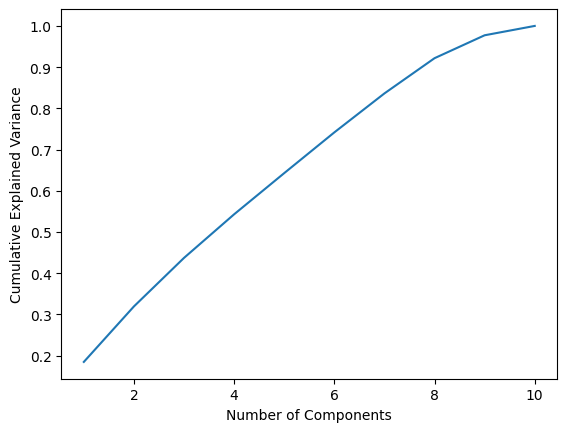

In [52]:
from sklearn.decomposition import PCA

scaler_all = StandardScaler()
scaled_data = scaler_all.fit_transform(train_df.drop(columns=['Y']))

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Visualize explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

This shows that we can keep 9 or 10 columns to achieve maximum accuracy when predicting the target.<br>
Because our dataset is small we will use the ten features.

# Modeling

In [53]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Y', axis=1)  
y = train_df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

split_train = X_train.copy()
split_train['Y'] = y_train

## Naive Bayes

In [58]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Class distribution before SMOTE:", Counter(y_train))

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_res, y_res = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_res))

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = GaussianNB()

nb_model.fit(X_res, y_res)

y_pred = nb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Class distribution before SMOTE: Counter({0: 4446, 1: 859, 3: 761, 2: 752})
Class distribution after SMOTE: Counter({0: 4446, 1: 4446, 3: 4446, 2: 4446})
Accuracy: 0.9970674486803519
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1131
           1       0.98      1.00      0.99       224
           2       1.00      1.00      1.00       176
           3       1.00      1.00      1.00       174

    accuracy                           1.00      1705
   macro avg       0.99      1.00      1.00      1705
weighted avg       1.00      1.00      1.00      1705



## Actual Test

In [59]:
tst_df['X9']=tst_df['X9'].fillna('Unknown')
tst_df['X9'] = tst_df['X9'].map(mapping_X9)
tst_df['X1'] = tst_df['X1'].map(frequency_encoding)
tst_df['X3'] = tst_df['X3'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
tst_df['X10'] = oe_X10.fit_transform(tst_df[['X10']])
tst_df['X3'] = le_X3.fit_transform(tst_df['X3'])
tst_df['X5'] = le_X5.fit_transform(tst_df['X5'])
tst_df['X7'] = le_X7.fit_transform(tst_df['X7'])
tst_df['X2'] = X2_imputer.fit_transform(tst_df[['X2']])
tst_df['X4'] = tst_df['X4'].clip(lower=lower_bound_X4, upper=upper_bound_X4)
tst_df[['X4', 'X8']] = transformer.fit_transform(tst_df[['X4', 'X8']])

tst_df[num_cols] = num_col_scaler.fit_transform(tst_df[num_cols])

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [60]:
tst_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,2,0.964275,0,0.079933,13,0.323413,9,0.515828,2,0.0
1,3,0.222983,1,0.359341,4,0.235849,2,0.894117,0,1.0
2,5,0.598095,0,0.746588,11,0.894140,0,0.473230,0,2.0
3,6,0.164335,0,0.157526,13,0.524488,2,0.894117,0,1.0
4,5,0.473057,1,0.834518,4,0.862069,5,0.000000,2,2.0
...,...,...,...,...,...,...,...,...,...,...
5676,7,0.353974,1,0.139215,13,0.466011,8,0.431598,1,0.0
5677,6,0.181304,1,0.930562,15,0.584637,3,1.000000,2,2.0
5678,7,0.324204,0,0.603723,8,0.369798,7,0.649638,0,1.0
5679,5,0.639774,1,0.000000,3,0.778487,2,0.894117,0,1.0


In [61]:
y_pred = nb_model.predict(tst_df)

In [62]:
submission = pd.DataFrame({
    'row_id': tst_df.index,
    'label': y_pred         
})
submission.to_csv('submission.csv', index=False)

In [63]:
submission

,row_id,label
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
5676,5676,0
5677,5677,2
5678,5678,0
5679,5679,0


In [ ]:
# submission.to_csv('submission.csv', index=False)